In [7]:
import matplotlib.pyplot as plt
import torch

# Evaluation of DP Models with varying Noise Multipliers

This script can be used to analyze and plot the metrics and losses gather during the training of the DP models with varying noise multipliers..

In [8]:
width = 6.5  # in inches
height = width * 0.75  # 4:3 aspect ratio
fig_size = (width, height)

In [9]:
noise_multipliers = [0.5, 0.75, 1.0, 1.25, 1.5, 2.0]
last_epochs = {0.5: 301, 0.75: 500, 1.0: 500, 1.25: 500, 1.5: 500, 2.0: 500}
experiments = list(noise_multipliers)

len(experiments)

figure_base_path = "figures/dp/"

In [10]:
losses = {}
for noise_multiplier in noise_multipliers:
    losses[noise_multiplier] = torch.load(f'../losses/dp/losses_dp_{noise_multiplier}_epoch{last_epochs[noise_multiplier]}.pt')

metrics = {}
for noise_multiplier in noise_multipliers:
    metrics[noise_multiplier] = torch.load(f'../metrics/dp/metrics_dp_{noise_multiplier}_epoch{last_epochs[noise_multiplier]}.pt', weights_only=False)

def plot_loss(losses, noise_multipliers, figure_base_path):
    for noise_multiplier in noise_multipliers:
        # Plot the training loss and validation loss, show the plot and not save it
        plt.figure(figsize=fig_size)
        plt.plot(losses[noise_multiplier]['train_loss'], label='Train Loss', color='blue')
        plt.plot(losses[noise_multiplier]['val_loss'], label='Validation Loss', color='orange', linestyle='--')
        plt.title(f"Training and Validation Loss for Noise Multiplier {noise_multiplier}")
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        ax = plt.gca()
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        plt.tight_layout()
        plt.savefig(f'{figure_base_path}loss_dp_{noise_multiplier}.pdf')
        plt.close()

def plot_loss_last_100_epochs(losses, noise_multipliers, figure_base_path):
    for noise_multiplier in noise_multipliers:
        # Plot the training loss and validation loss for the last 100 epochs
        plt.figure(figsize=fig_size)
        num_epochs = len(losses[noise_multiplier]['train_loss'])
        last_100_epochs = range(num_epochs - 99, num_epochs + 1)
        plt.plot(last_100_epochs, losses[noise_multiplier]['train_loss'][-100:], label='Train Loss', color='blue')
        plt.plot(last_100_epochs, losses[noise_multiplier]['val_loss'][-100:], label='Validation Loss', color='orange', linestyle='--')
        plt.title(f"Training and Validation Loss for Noise Multiplier {noise_multiplier} (Last 100 Epochs)")
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        ax = plt.gca()
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        plt.tight_layout()
        plt.savefig(f'{figure_base_path}loss_dp_{noise_multiplier}_last_100_epochs.pdf')
        plt.close()


plot_loss(losses, noise_multipliers, figure_base_path)
plot_loss_last_100_epochs(losses, noise_multipliers, figure_base_path)

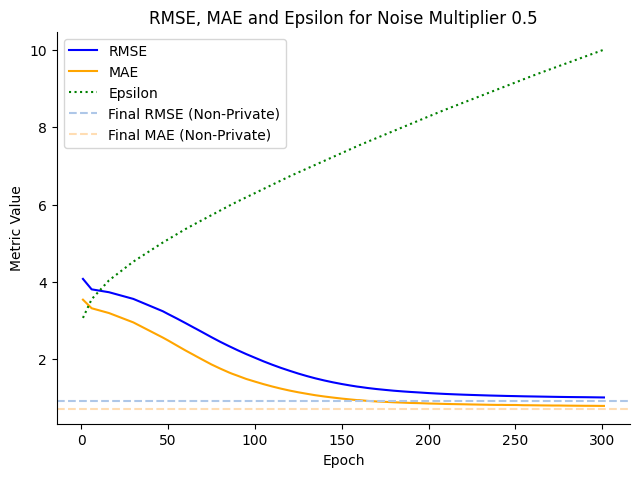

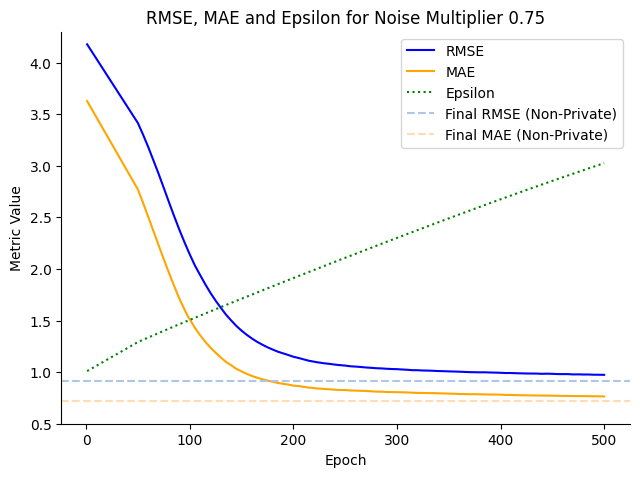

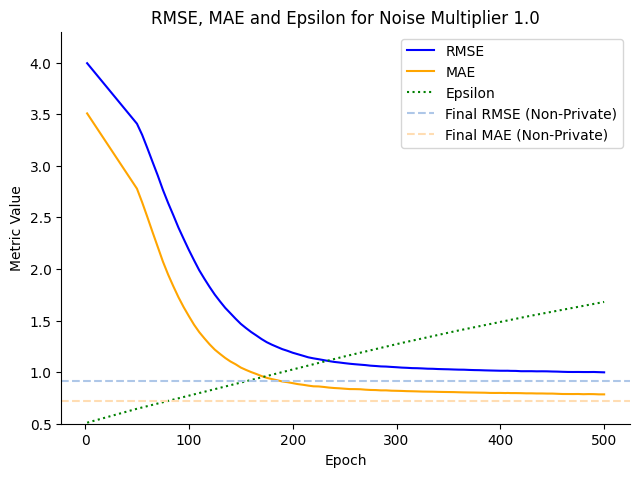

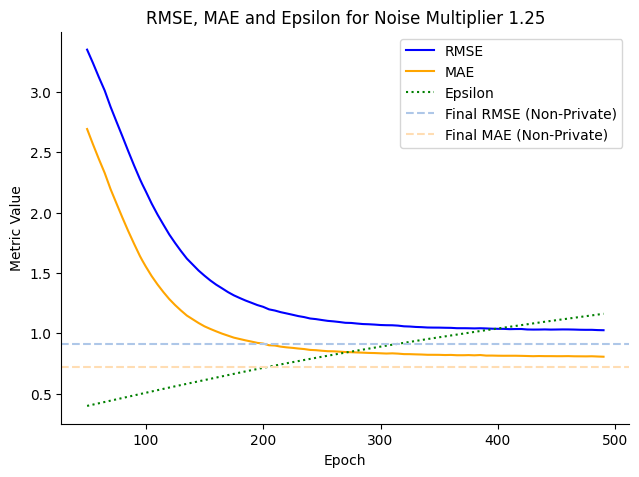

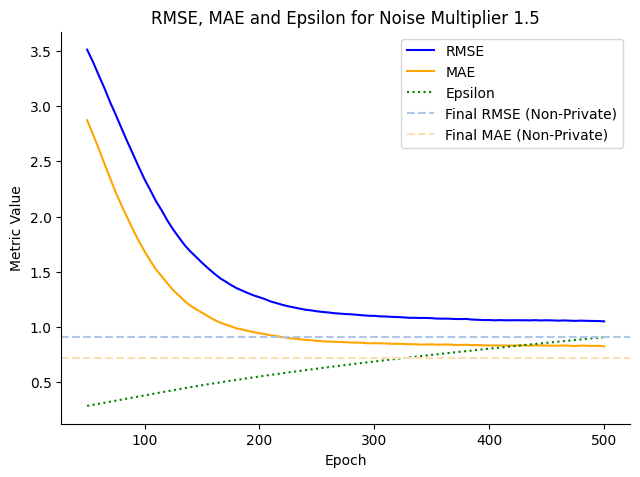

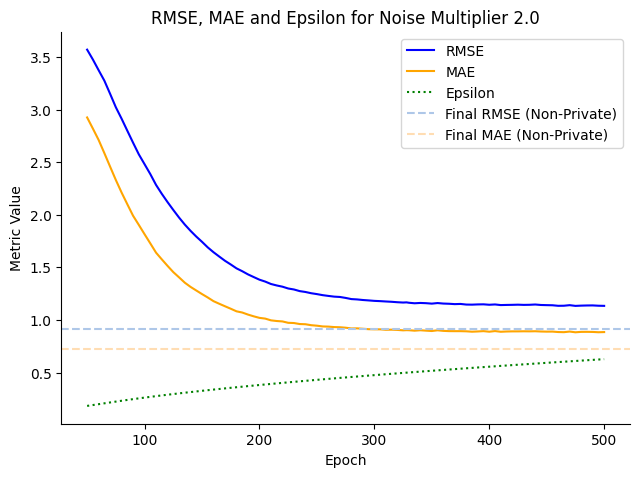

In [11]:
def plot_metrics(metrics, noise_multipliers, figure_base_path):
    for noise_multiplier in noise_multipliers:
        epochs = [entry['epoch'] for entry in metrics[noise_multiplier]]
        rmses = [entry['rmse'] for entry in metrics[noise_multiplier]]
        maes = [entry['mae'] for entry in metrics[noise_multiplier]]
        epsilons = [entry['epsilon'] for entry in metrics[noise_multiplier]]
        plt.figure(figsize=fig_size)
        plt.plot(epochs, rmses, label='RMSE', color='blue')
        plt.plot(epochs, maes, label='MAE', color='orange')
        plt.plot(epochs, epsilons, label='Epsilon', color='green', linestyle=':')
        plt.axhline(y=0.911, color='#aec7e8', linestyle='--', label='Final RMSE (Non-Private)')
        plt.axhline(y=0.722, color='#ffddb3', linestyle='--', label='Final MAE (Non-Private)')
        plt.title(f"RMSE, MAE and Epsilon for Noise Multiplier {noise_multiplier}")
        plt.xlabel('Epoch')
        plt.ylabel('Metric Value')
        if noise_multiplier == 0.75 or noise_multiplier == 1.0:
            plt.ylim(0.5, 4.3)  # Set y-axis scale from 0.5 to 5
        plt.legend()
        ax = plt.gca()
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        plt.tight_layout()
        plt.savefig(f'{figure_base_path}metrics_dp_{noise_multiplier}.pdf')
        plt.show()
        plt.close()


plot_metrics(metrics, noise_multipliers, figure_base_path)


In [12]:
for noise_multiplier in noise_multipliers:
    print(f"Noise Multiplier: {noise_multiplier:.2f}, RMSE: {metrics[noise_multiplier][-1]['rmse']:.3f}, MAE: {metrics[noise_multiplier][-1]['mae']:.3f}, Epsilon: {metrics[noise_multiplier][-1]['epsilon']:.2f}, Epochs: {last_epochs[noise_multiplier]}")
print(f"Non-Private, RMSE: 0.911, MAE: 0.722, Epsilon: inf, Epochs: 300")

Noise Multiplier: 0.50, RMSE: 1.015, MAE: 0.796, Epsilon: 10.00, Epochs: 301
Noise Multiplier: 0.75, RMSE: 0.974, MAE: 0.764, Epsilon: 3.03, Epochs: 500
Noise Multiplier: 1.00, RMSE: 0.998, MAE: 0.785, Epsilon: 1.68, Epochs: 500
Noise Multiplier: 1.25, RMSE: 1.027, MAE: 0.807, Epsilon: 1.16, Epochs: 500
Noise Multiplier: 1.50, RMSE: 1.052, MAE: 0.827, Epsilon: 0.91, Epochs: 500
Noise Multiplier: 2.00, RMSE: 1.135, MAE: 0.886, Epsilon: 0.63, Epochs: 500
Non-Private, RMSE: 0.911, MAE: 0.722, Epsilon: inf, Epochs: 300
